# Multi-microphone Beamforming

Using a microphone array can be very handy to improve the signal quality (e.g. reduce reverberation and noise) prior to performing speech recognition tasks.
Microphone arrays can also estimate the direction of arrival of a sound source, and this information can later be used to "listen" in the direction of the source of interest.

## Propagation model

We assume the following propagation model for sound: 

$x_m[n] = h_m[n] \star s[n] + b_m[n]$, 

where $m$ stands for the microphone index, $n$ for the sample index, and $h_m$ for the room impulse response. The expression $s[n]$ stands for the signal of the speech source, $b_m[n]$ the additive noise and $x_m[n]$ the signal captured at microphone $m$. The signals can also be expressed in the frequency domain:

$X_m(t,j\omega) = H_m(j\omega)S(t,j\omega) + B_m(t,j\omega)$, 

or in the vector form:

$\mathbf{X}(t,j\omega) = \mathbf{H}(j\omega)S(t,j\omega) + \mathbf{B}(t,j\omega)$. 

Note that $\mathbf{X}(t,j\omega) \in \mathbb{C}^{M \times 1}$.

In the anechoic case, we can substitute $h_m[n] = a_m[n] = \delta(n-\tau_m)$, and we write $H_m(j\omega) = A_m(j\omega) = e^{-j\omega\tau_m}$, where $\tau_m$ is the time delay for the direct path in samples, or in the vector form $\mathbf{A}(j\omega) \in \mathbb{C}^{M \times 1}$.

## Covariance matrices

We also use the following covariance matrices with some beamformers:

$\displaystyle\mathbf{R}_{XX}(j\omega) = \frac{1}{T}\sum_{t=1}^{T}\mathbf{X}(t,j\omega)\mathbf{X}^H(t,j\omega)$

$\displaystyle\mathbf{R}_{SS}(j\omega) = \frac{1}{T}\sum_{t=1}^{T}\mathbf{H}(j\omega)\mathbf{H}^H(j\omega)|S(t,j\omega)|^2$

$\displaystyle\mathbf{R}_{NN}(j\omega) = \frac{1}{T}\sum_{t=1}^{T}\mathbf{B}(t,j\omega)\mathbf{B}^H(t,j\omega)$

In practice, it is common to use an time-frequency mask to estimate the covariance matrices for speech and noise:

$\displaystyle\mathbf{R}_{SS}(j\omega) \approx \frac{1}{T}\sum_{t=1}^{T}M_S(t,j\omega)\mathbf{X}(t,j\omega)\mathbf{X}^H(t,j\omega)$

$\displaystyle\mathbf{R}_{NN}(j\omega) \approx \frac{1}{T}\sum_{t=1}^{T}M_N(t,j\omega)\mathbf{X}(t,j\omega)\mathbf{X}^H(t,j\omega)$

## Time Difference of Arrival

The time difference of arrival between microphone $1$ and $m$ can be estimated using the Generalized Cross-Correlation with Phase Transform (GCC-PHAT) with the following expression:

$\displaystyle\tau_m = argmax_{\tau} \int_{-\pi}^{+\pi}{\frac{X_1(j\omega) X_m(j\omega)^*}{|X_1(j\omega)||X_m(j\omega)|}e^{j\omega\tau}}d\omega$

## Direction of Arrival

### Steered-Response Power with Phase Transform

SRP-PHAT scans each potential direction of arrival on a virtual unit sphere around the array and compute the corresponding power. For each DOA (denoted by the unit vector $\mathbf{u}$), there is a steering vector $\mathbf{A}(j\omega,\mathbf{u}) \in \mathbb{C}^{M \times 1}$ in the direction of $\mathbf{u}$:

$\displaystyle E(\mathbf{u}) = \sum_{p=1}^{M}{\sum_{q=p+1}^{M}{\int_{-\pi}^{+\pi}{\frac{X_p(j\omega)X_q(j\omega)^*}{|X_p(j\omega)||X_q(j\omega)|}}}A_p(j\omega,\mathbf{u})A_q(j\omega,\mathbf{u})^* d\omega}$

The DOA with the maximum power is selected as the DOA of sound:

$\mathbf{u}_{max} = argmax_{\mathbf{u}}{E(\mathbf{u})}$

### Multiple Signal Classification

MUSIC scans each potential direction of arrival on a virtual unit sphere around the array and compute the corresponding power. For each DOA (denoted by the unit vector $\mathbf{u}$), there is a steering vector $\mathbf{A}(j\omega,\mathbf{u}) \in \mathbb{C}^{M \times 1}$ in the direction of $\mathbf{u}$. The matrix $\mathbf{U}(j\omega) \in \mathbb{C}^{M \times S}$ contains the $S$ eigenvectors that correspond to the $S$ smallest eigenvalues obtained while performing eigendecomposition on $\mathbf{R}_{XX}(j\omega)$. The power corresponds to: 

$\displaystyle E(\mathbf{u}) = \frac{\mathbf{A}(j\omega,\mathbf{u})^H \mathbf{A}(j\omega,\mathbf{u})}{\sqrt{\mathbf{A}(j\omega,\mathbf{u})^H \mathbf{U}(j\omega)\mathbf{U}(j\omega)^H\mathbf{A}(j\omega,\mathbf{u})}}$

The DOA with the maximum power is selected as the DOA of sound:

$\mathbf{u}_{max} = argmax_{\mathbf{u}}{E(\mathbf{u})}$

## Beamforming

We apply beamforming in the frequency domain: $Y(j\omega) = \mathbf{W}^H(j\omega)\mathbf{X}(j\omega)$.

### Delay and sum

The delay and sum beamformer aims to align the speech signal to create constructive interference. The coefficients are chosen such that:

$\mathbf{W}(j\omega) = \frac{1}{M} \mathbf{A}(j\omega)$.

### Minimum Variance Distortionless Response

The MVDR beamformer has the following coefficients:

$\displaystyle\mathbf{W}(j\omega) = \frac{\mathbf{R}_{XX}^{-1}(j\omega)\mathbf{A}(j\omega)}{\mathbf{A}^H(j\omega)\mathbf{R}_{XX}^{-1}(j\omega)\mathbf{A}(j\omega)}$.

### Generalized Eigenvalue

The GEV beamformer coefficients correspond to the principal component obtain from generalized eigenvalue decomposition, such that:

$\mathbf{R}_{SS}(j\omega)\mathbf{W}(j\omega) = \lambda\mathbf{R}_{NN}(j\omega)\mathbf{W}(j\omega)$


# Install SpeechBrain

Let's first install SpeechBrain:

In [ ]:
%%capture
!pip install speechbrain

# Prepare audio

We will then load a speech signal obtained by simulating propagation in air for a 4-microphone array. We will also load diffuse noise (in all direction) and directive noise (can be modeled as a point source in space). The goal here is to mix the reverberated speech with noise to generate the noisy mixture, and test the beamforming methods to enhance speech.

We first download the audio samples to be used:

In [ ]:
%%capture
!wget https://www.dropbox.com/s/1bag9h3q588bjxx/speech_-0.82918_0.55279_-0.082918.flac
!wget https://www.dropbox.com/s/6vlnqgs076i846k/noise_diffuse.flac
!wget https://www.dropbox.com/s/esx4fetsvgjr3nt/noise_0.70225_-0.70225_0.11704.flac

We will now load the audio files:

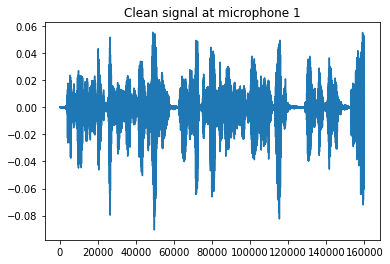

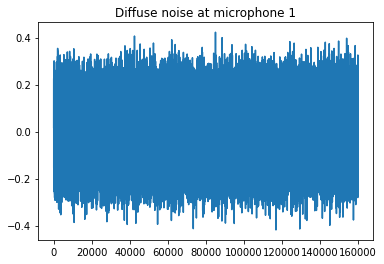

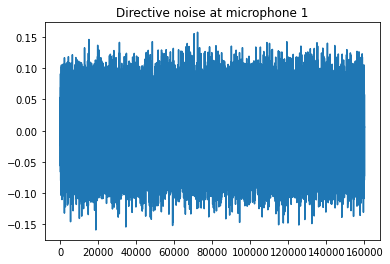

In [ ]:
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio

xs_speech = read_audio('speech_-0.82918_0.55279_-0.082918.flac') # [time, channels]
xs_speech = xs_speech.unsqueeze(0) # [batch, time, channels]
xs_noise_diff = read_audio('noise_diffuse.flac') # [time, channels]
xs_noise_diff = xs_noise_diff.unsqueeze(0) # [batch, time, channels]
xs_noise_loc = read_audio('noise_0.70225_-0.70225_0.11704.flac') # [time, channels]
xs_noise_loc =  xs_noise_loc.unsqueeze(0) # [batch, time, channels]
fs = 16000 # sampling rate

plt.figure(1)
plt.title('Clean signal at microphone 1')
plt.plot(xs_speech.squeeze()[:,0])
plt.figure(2)
plt.title('Diffuse noise at microphone 1')
plt.plot(xs_noise_diff.squeeze()[:,0])
plt.figure(3)
plt.title('Directive noise at microphone 1')
plt.plot(xs_noise_loc.squeeze(0)[:,0])
plt.show()

We can listen to the reverberated speech:

In [ ]:
from IPython.display import Audio
Audio(xs_speech.squeeze()[:,0],rate=fs)

We now mix reverberated speech with noise to create the noisy multichannel mixture:

In [ ]:
ss = xs_speech
nn_diff = 0.05 * xs_noise_diff
nn_loc = 0.05 * xs_noise_loc
xs_diffused_noise = ss + nn_diff
xs_localized_noise = ss + nn_loc

We can look at the noisy mixture:

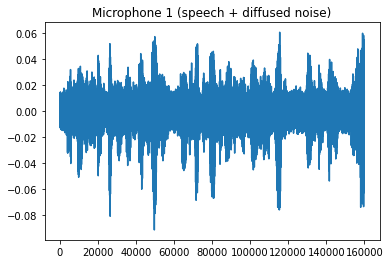

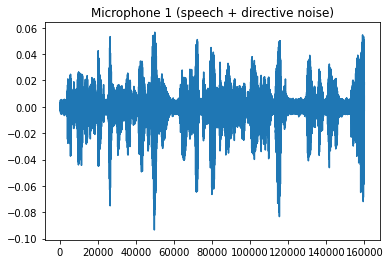

In [ ]:
plt.figure(1)
plt.title('Microphone 1 (speech + diffused noise)')
plt.plot(xs_diffused_noise.squeeze()[:,0])
plt.figure(2)
plt.title('Microphone 1 (speech + directive noise)')
plt.plot(xs_localized_noise.squeeze()[:,0])
plt.show()

We can listen to the noisy mixture:

In [ ]:
from IPython.display import Audio
Audio(xs_diffused_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(xs_localized_noise.squeeze()[:,0],rate=fs)

# Processing

## Steered-Response Power with Phase Transform

STFT will convert the signals in the frequency domain, and then covariance will compute the covariance matrix for each frequency bin. The SRP-PHAT module will return the direction of arrival. We need to provide the microphone array geometry, which in this example is a circular array with four microphones uniformly spaced and a diameter of 0.1m. The system estimates the DOA for each STFT frame. In this example we use a sound source that comes from direction $x=-0.82918$, $y=0.55279$ and $z=-0.082918$. We see from the results that the direction is quite accurate (there is a slight difference due to the sphere discretization). Also note that as all microphones lie on the $xy$-plane, the system cannot distinguish from the positive $z$-axis and negative $z$-axis.



In [ ]:
from speechbrain.dataio.dataio import read_audio
from speechbrain.processing.features import STFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import SrpPhat

import torch

mics = torch.zeros((4,3), dtype=torch.float)
mics[0,:] = torch.FloatTensor([-0.05, -0.05, +0.00])
mics[1,:] = torch.FloatTensor([-0.05, +0.05, +0.00])
mics[2,:] = torch.FloatTensor([+0.05, +0.05, +0.00])
mics[3,:] = torch.FloatTensor([+0.05, +0.05, +0.00])

stft = STFT(sample_rate=fs)
cov = Covariance()
srpphat = SrpPhat(mics=mics)

Xs = stft(xs_diffused_noise)
XXs = cov(Xs)
doas = srpphat(XXs)

print(doas)

tensor([[[-0.8284,  0.5570,  0.0588],
         [-0.8284,  0.5570,  0.0588],
         [-0.8284,  0.5570,  0.0588],
         ...,
         [-0.8284,  0.5570,  0.0588],
         [-0.8284,  0.5570,  0.0588],
         [-0.8284,  0.5570,  0.0588]]])


## Multiple Signal Classification

STFT will convert the signals in the frequency domain, and then covariance will compute the covariance matrix for each frequency bin. The MUSIC module will return the direction of arrival. We need to provide the microphone array geometry, which in this example is a circular array with four microphones uniformly spaced and a diameter of 0.1m. The system estimates the DOA for each STFT frame. In this example we use a sound source that comes from direction $x=-0.82918$, $y=0.55279$ and $z=-0.082918$. We see from the results that the direction is quite accurate (there is a slight difference due to the sphere discretization). Also note that as all microphones lie on the $xy$-plane, the system cannot distinguish from the positive $z$-axis and negative $z$-axis.


In [ ]:
from speechbrain.dataio.dataio import read_audio
from speechbrain.processing.features import STFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import Music

import torch

mics = torch.zeros((4,3), dtype=torch.float)
mics[0,:] = torch.FloatTensor([-0.05, -0.05, +0.00])
mics[1,:] = torch.FloatTensor([-0.05, +0.05, +0.00])
mics[2,:] = torch.FloatTensor([+0.05, +0.05, +0.00])
mics[3,:] = torch.FloatTensor([+0.05, +0.05, +0.00])

stft = STFT(sample_rate=fs)
cov = Covariance()
music = Music(mics=mics)

Xs = stft(xs_diffused_noise)
XXs = cov(Xs)
doas = music(XXs)

print(doas)

tensor([[[-0.8271,  0.5576, -0.0702],
         [-0.8271,  0.5576, -0.0702],
         [-0.8271,  0.5576, -0.0702],
         ...,
         [-0.8271,  0.5576, -0.0702],
         [-0.8271,  0.5576, -0.0702],
         [-0.8271,  0.5576, -0.0702]]])




## Delay-and-Sum Beamforming

STFT will convert the signals in the frequency domain, and then covariance will compute the covariance matrix for each frequency bin. The GCC-PHAT module will estimate the Time Difference of Arrival (TDOA) between each microphone, and use this TDOA to perform delay and sum.

### Speech corrupted with diffuse noise

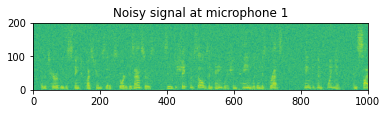

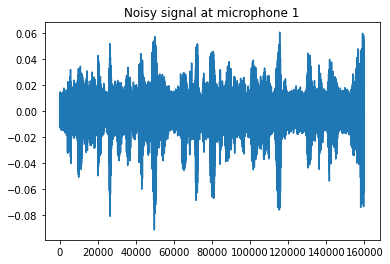

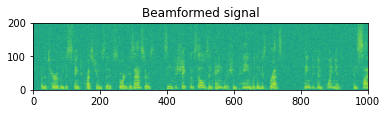

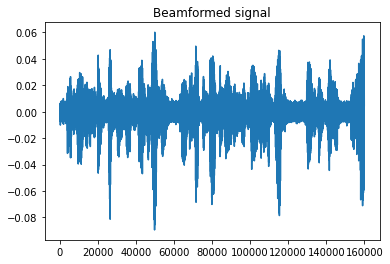

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import GccPhat
from speechbrain.processing.multi_mic import DelaySum

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
delaysum = DelaySum()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_diffused_noise)
XXs = cov(Xs)
tdoas = gccphat(XXs)
Ys_ds = delaysum(Xs, tdoas)
ys_ds = istft(Ys_ds)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_diffused_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_ds[0,:,:,0,0]**2 + Ys_ds[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_ds.squeeze())
plt.show()

We can also listen to the beamformed signal and compare with the noisy signal.

In [ ]:
from IPython.display import Audio
Audio(xs_diffused_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_ds.squeeze(),rate=fs)

### Speech corrupted with directive noise

When we have directive noise, this is more tricky as GCC-PHAT can capture the TDOAs from the noise source. For now we will simply assume we know the TDOAs, but ideal binary mask could be applied to differentiate the speech TDOAs from the noise TDOAs.

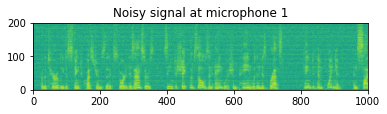

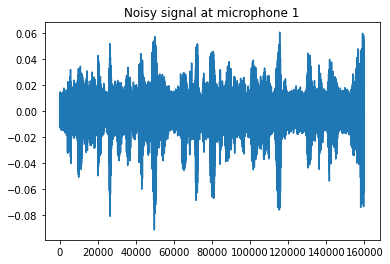

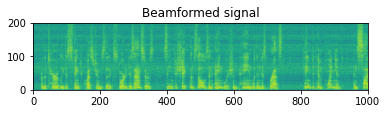

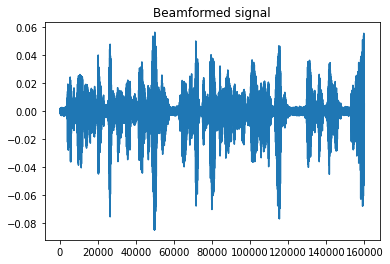

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import GccPhat
from speechbrain.processing.multi_mic import DelaySum

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
delaysum = DelaySum()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_diffused_noise)
XXs = cov(Xs)
tdoas = gccphat(XXs)

Xs = stft(xs_localized_noise)
XXs = cov(Xs)
Ys_ds = delaysum(Xs, tdoas)
ys_ds = istft(Ys_ds)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_diffused_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_ds[0,:,:,0,0]**2 + Ys_ds[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_ds.squeeze())
plt.show()

We can also listen to the beamformed signal and compare with the noisy signal.

In [ ]:
from IPython.display import Audio
Audio(xs_localized_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_ds.squeeze(),rate=fs)

## Minimum Variance Distortionless Response

STFT will convert the signals in the frequency domain, and then covariance will compute the covariance matrix for each frequency bin. The GCC-PHAT module will estimate the Time Difference of Arrival (TDOA) between each microphone, and use this TDOA to perform MVDR beamforming.


### Speech corrupted with diffuse noise

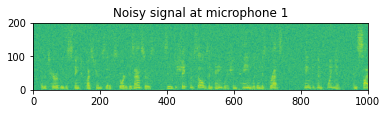

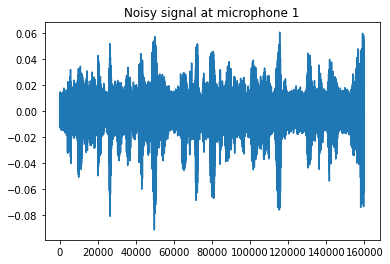

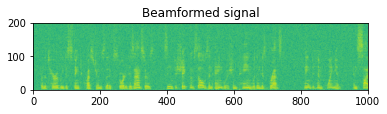

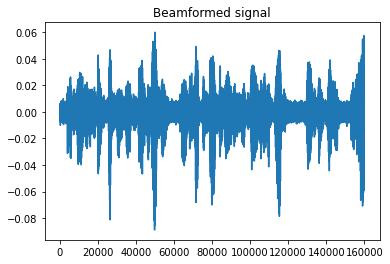

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import GccPhat
from speechbrain.processing.multi_mic import Mvdr

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
mvdr = Mvdr()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_diffused_noise)
Nn = stft(nn_diff)
NNs = cov(Nn)
XXs = cov(Xs)
tdoas = gccphat(XXs)
Ys_mvdr = mvdr(Xs, NNs, tdoas)
ys_mvdr = istft(Ys_mvdr)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_diffused_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_mvdr[0,:,:,0,0]**2 + Ys_mvdr[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_mvdr.squeeze())
plt.show()

In [ ]:
from IPython.display import Audio
Audio(xs_diffused_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_mvdr.squeeze(),rate=fs)

### Speech corrupted with directive noise
Once again, when we have directive noise, this is more tricky as GCC-PHAT can capture the TDOAs from the noise source. For now we will simply assume we know the TDOAs, but ideal binary mask could be applied to differentiate the speech TDOAs from the noise TDOAs.

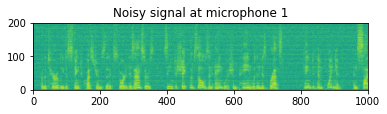

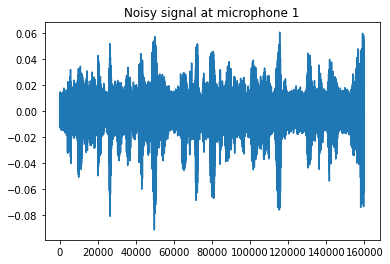

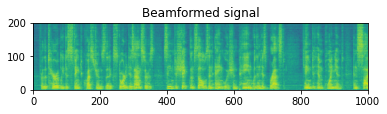

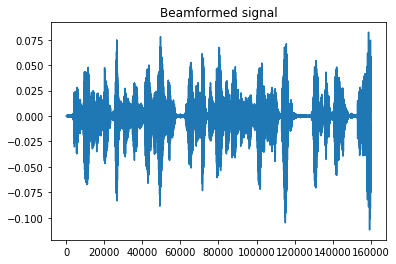

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import GccPhat
from speechbrain.processing.multi_mic import Mvdr

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
mvdr = Mvdr()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_diffused_noise)
Nn = stft(nn_loc)
XXs = cov(Xs)
NNs = cov(Nn)
tdoas = gccphat(XXs)

Xs = stft(xs_localized_noise)
Ys_mvdr = mvdr(Xs, NNs, tdoas)
ys_mvdr = istft(Ys_mvdr)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_diffused_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_mvdr[0,:,:,0,0]**2 + Ys_mvdr[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_mvdr.squeeze())
plt.show()

In [ ]:
from IPython.display import Audio
Audio(xs_localized_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_mvdr.squeeze(),rate=fs)

## Generalized Eigenvalue Beamforming

STFT will convert the signals in the frequency domain, and then covariance will compute the covariance matrix for each frequency bin. We assume we can compute the covariance matrix for speech and noise, respectively, and use it for beamforming. The covariance matrix can be estimated using ideal binary masks.


### Speech corrupted with diffuse noise

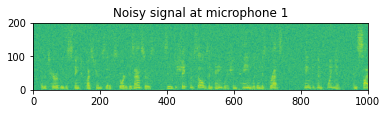

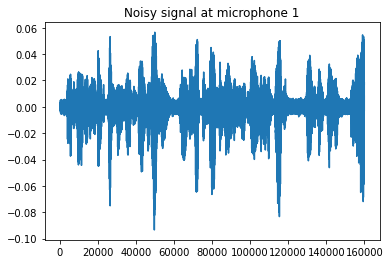

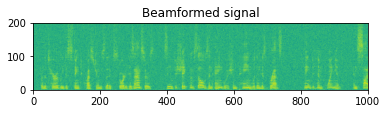

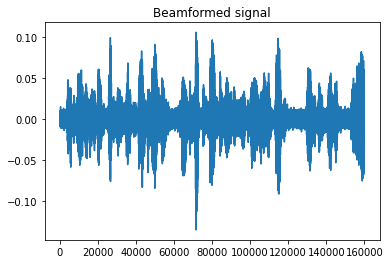

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import Gev

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
gev = Gev()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_diffused_noise)
Ss = stft(ss)
Nn = stft(nn_diff)
SSs = cov(Ss)
NNs = cov(Nn)
Ys_gev = gev(Xs, SSs, NNs)
ys_gev = istft(Ys_gev)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_localized_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_gev[0,:,:,0,0]**2 + Ys_gev[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_gev.squeeze())
plt.show()

In [ ]:
from IPython.display import Audio
Audio(xs_localized_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_gev.squeeze(),rate=fs)

### Speech corrupted with directive noise

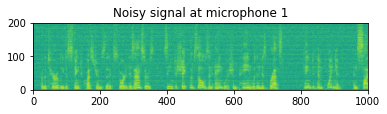

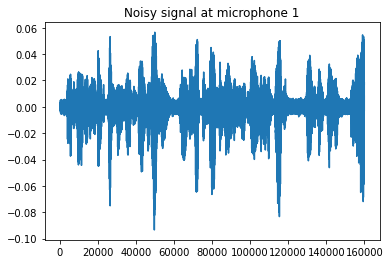

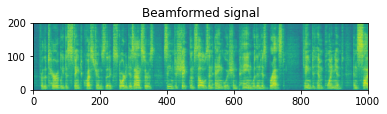

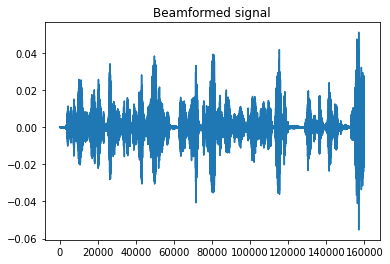

In [ ]:
from speechbrain.processing.features import STFT, ISTFT
from speechbrain.processing.multi_mic import Covariance
from speechbrain.processing.multi_mic import Gev

import matplotlib.pyplot as plt
import torch

stft = STFT(sample_rate=fs)
cov = Covariance()
gccphat = GccPhat()
gev = Gev()
istft = ISTFT(sample_rate=fs)

Xs = stft(xs_localized_noise)
Ss = stft(ss)
Nn = stft(nn_loc)
SSs = cov(Ss)
NNs = cov(Nn)
Ys_gev = gev(Xs, SSs, NNs)
ys_gev = istft(Ys_gev)

plt.figure(1)
plt.title('Noisy signal at microphone 1')
plt.imshow(torch.transpose(torch.log(Xs[0,:,:,0,0]**2 + Xs[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(2)
plt.title('Noisy signal at microphone 1')
plt.plot(xs_localized_noise.squeeze()[:,0])
plt.figure(3)
plt.title('Beamformed signal')
plt.imshow(torch.transpose(torch.log(Ys_gev[0,:,:,0,0]**2 + Ys_gev[0,:,:,1,0]**2), 1, 0), origin="lower")
plt.figure(4)
plt.title('Beamformed signal')
plt.plot(ys_gev.squeeze())
plt.show()

In [ ]:
from IPython.display import Audio
Audio(xs_localized_noise.squeeze()[:,0],rate=fs)

In [ ]:
from IPython.display import Audio
Audio(ys_gev.squeeze(),rate=fs)

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```